In [160]:
import stumpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize

In [3]:
pd.options.display.float_format = "{:,.4f}".format
np.set_printoptions(suppress=True)

In [4]:
connection = sqlite3.connect('../data/GBPUSD.db')
df = pd.read_sql_query("SELECT * FROM d_2010", connection, parse_dates=True)

In [5]:
df.head()

,pTime,pOpen,pHigh,pLow,pClose,vcOpen,vcHigh,vcLow,vcClose
0,1262304000,1.6176,1.6176,1.6160,1.6170,3.0161,3.0161,-0.8268,1.5204
1,1262305800,1.6170,1.6170,1.6168,1.6170,1.4076,1.5172,1.0513,1.3254
2,1262307600,1.6170,1.6170,1.6168,1.6169,1.0475,1.2609,0.7426,0.8950
3,1262309400,1.6169,1.6170,1.6168,1.6170,1.2147,1.5805,0.9222,1.3976
4,1262311200,1.6169,1.6171,1.6168,1.6170,1.2407,1.9355,0.9367,1.5012


In [6]:
data = df[['pTime', 'pOpen', 'pHigh', 'pLow', 'pClose']]

In [7]:
index = data['pTime']
data = data.drop('pTime', axis=1)
data.index = index

In [8]:
data.head()

,pOpen,pHigh,pLow,pClose
pTime,,,,
1262304000,1.6176,1.6176,1.6160,1.6170
1262305800,1.6170,1.6170,1.6168,1.6170
1262307600,1.6170,1.6170,1.6168,1.6169
1262309400,1.6169,1.6170,1.6168,1.6170
1262311200,1.6169,1.6171,1.6168,1.6170


In [9]:
timeseries = data.mean(axis=1)

In [10]:
timeseries.head()

pTime
1262304000   1.6170
1262305800   1.6169
1262307600   1.6169
1262309400   1.6169
1262311200   1.6169
dtype: float64

In [11]:
timeseries_1k = timeseries[:1000]

In [12]:
timeseries_1k

pTime
1262304000   1.6170
1262305800   1.6169
1262307600   1.6169
1262309400   1.6169
1262311200   1.6169
              ...  
1264786200   1.6045
1264788000   1.6025
1264789800   1.6015
1264791600   1.6010
1264793400   1.6008
Length: 1000, dtype: float64

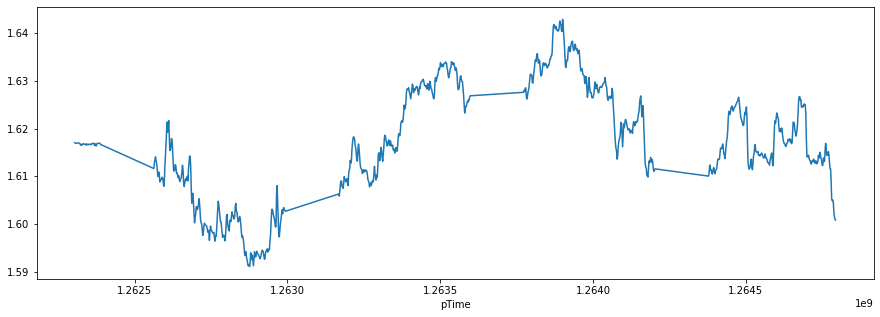

In [13]:
plt.figure(figsize=(15, 5))
sns.lineplot(y=timeseries_1k.values, x=timeseries_1k.index);

In [115]:
m = 30
mp = stumpy.stump(timeseries, m)

In [116]:
mp[:5]

array([[2.8002164371126668, 2616, -1, 2616],
       [2.9452273573348298, 2617, -1, 2617],
       [3.1129152506298468, 2618, -1, 2618],
       [3.4405599088778844, 10137, -1, 10137],
       [3.320032231291398, 10138, -1, 10138]], dtype=object)

In [117]:
timeseries.shape

(12522,)

In [118]:
len(mp)

12493

In [119]:
motif_index = np.argsort(mp[:, 0])[30]

In [120]:
motif_index

10337

In [121]:
nearest_neighbor_idx = mp[motif_index, 1]

In [122]:
nearest_neighbor_idx

2980

In [174]:
normalizer = Normalizer()
normalizer.fit([timeseries])
norm_timeseries = pd.Series(data=normalizer.transform([timeseries])[0] * 2, index=timeseries.index)

In [175]:
norm_timeseries.head()

pTime
1262304000   0.0187
1262305800   0.0187
1262307600   0.0187
1262309400   0.0187
1262311200   0.0187
dtype: float64

In [176]:
pattern_1 = norm_timeseries[nearest_neighbor_idx:].head(30)

In [177]:
pattern_1.head()

pTime
1285851600   0.0184
1285853400   0.0184
1285855200   0.0184
1285857000   0.0184
1285858800   0.0183
dtype: float64

In [178]:
pattern_2 = norm_timeseries[motif_index:].head(30)

In [179]:
pattern_2.index = pattern_1.index

In [180]:
pattern_2.head()

pTime
1285851600   0.0180
1285853400   0.0180
1285855200   0.0180
1285857000   0.0180
1285858800   0.0180
dtype: float64

<AxesSubplot:xlabel='pTime'>

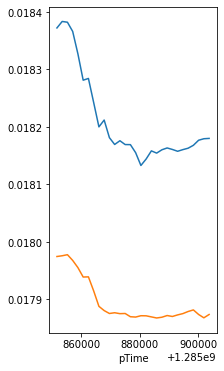

In [181]:
plt.figure(figsize=(3, 6))
sns.lineplot(data=pattern_1)
sns.lineplot(data=pattern_2)

In [182]:
def get_derivatives(data):
    return (np.diff(data.values) / np.diff(data.index))

<AxesSubplot:xlabel='pTime'>

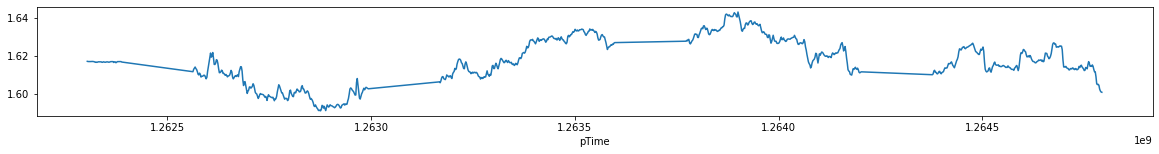

In [183]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=timeseries[:1000])

In [184]:
derivatives = normalize([get_derivatives(timeseries)])

In [185]:
derivatives = pd.Series(data=derivatives[0], index=timeseries.index[:-1])

In [186]:
norm_timeseries

pTime
1262304000   0.0187
1262305800   0.0187
1262307600   0.0187
1262309400   0.0187
1262311200   0.0187
              ...  
1293831000   0.0180
1293832800   0.0180
1293834600   0.0180
1293836400   0.0180
1293838200   0.0180
Length: 12522, dtype: float64

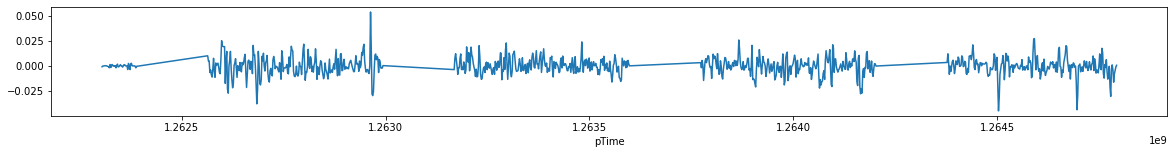

<AxesSubplot:xlabel='pTime'>

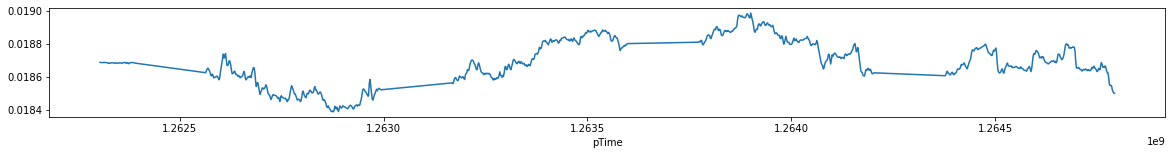

In [189]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=derivatives[:1000])
plt.show()
plt.figure(figsize=(20, 2))
sns.lineplot(data=norm_timeseries[:1000])

In [173]:
normalize([timeseries])

array([[0.00934379, 0.00934321, 0.00934309, ..., 0.0090152 , 0.00901727,
        0.00902061]])

0.000579406817700637
0.0008754002030345525


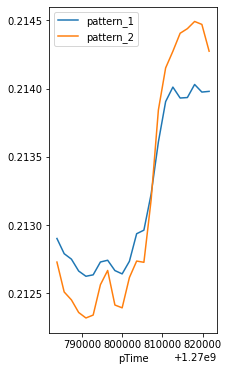

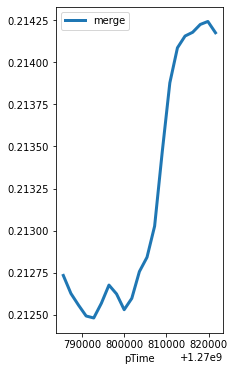

0.0006004399279807827
0.0008952037666438736


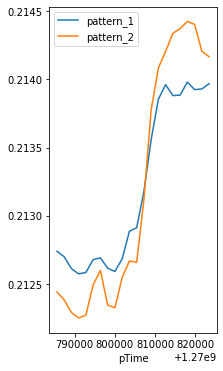

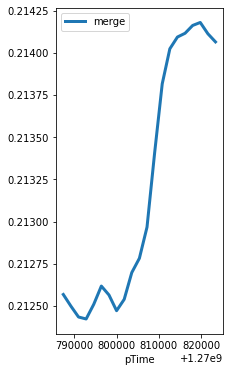

0.0005543134660573433
0.0008424819416084232


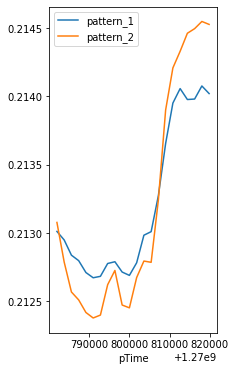

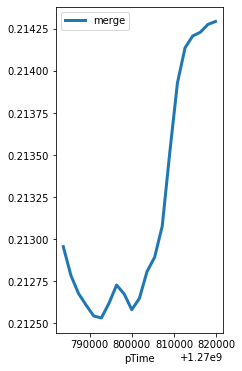

0.0009011182234939558
0.0006018280993139454


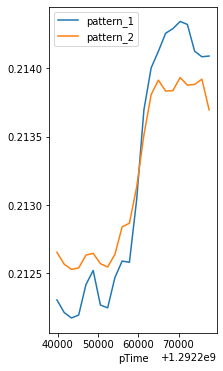

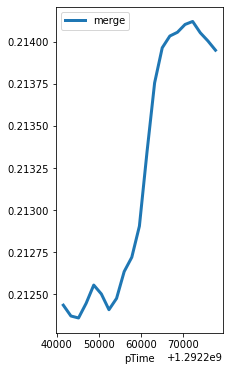

0.0004038893255865463
0.0006003693464609137


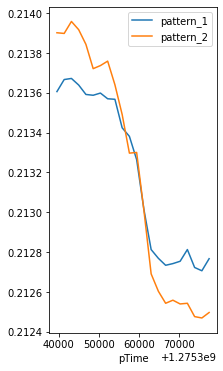

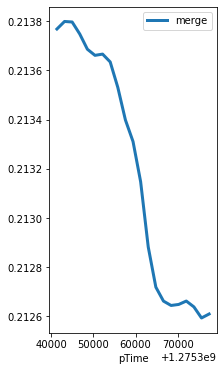

0.0006510919944283725
0.0004820882093703614


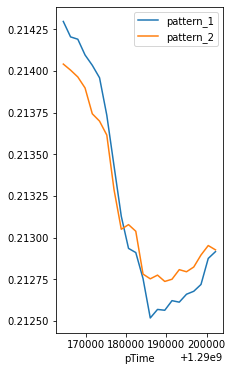

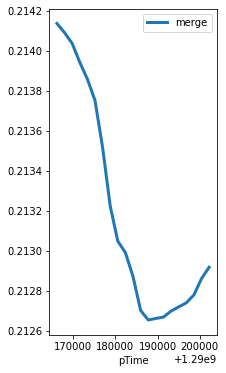

0.0006560472911150855
0.0005538395036018638


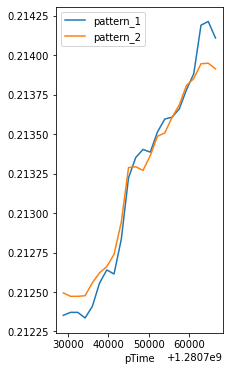

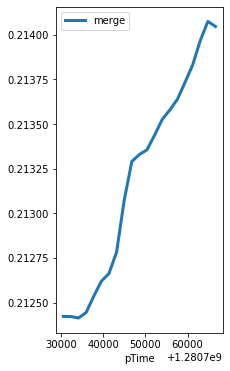

0.0004012087196340137
0.000589436497490339


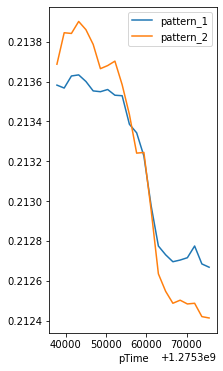

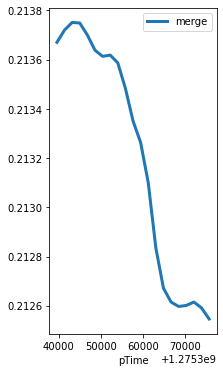

0.0005236582987942987
0.0007887451505658969


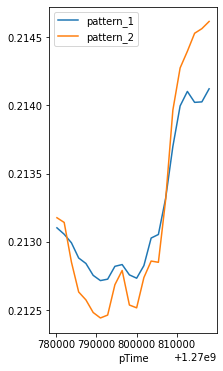

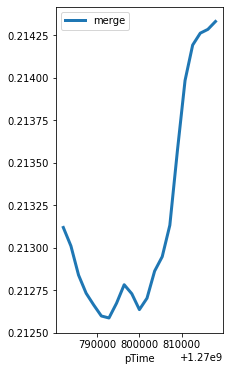

0.0003475768019471636
0.0014390842305319535


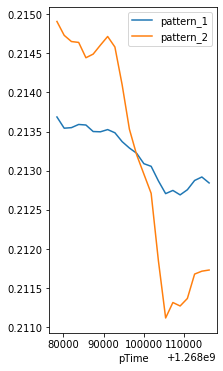

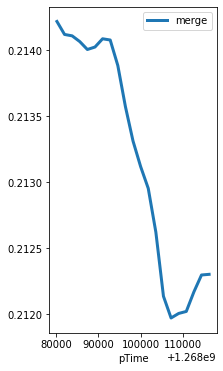

In [213]:
m = 22
mp = stumpy.stump(timeseries, m)

for pattern_index in range(1, 20, 2):
    motif_index = np.argsort(mp[:, 0])[pattern_index]

    nearest_neighbor_idx = mp[motif_index, 1]

    index = timeseries[nearest_neighbor_idx:].head(m).index
    pattern_1 = pd.Series(data=normalize([timeseries[nearest_neighbor_idx:].head(m)])[0], index=index)
    pattern_2 = pd.Series(data=normalize([timeseries[motif_index:].head(m)])[0], index=index)


    interval_1 = pattern_1.max() - pattern_1.min()
    interval_2 = pattern_2.max() - pattern_2.min()
    print(pattern_1.std())
    print(pattern_2.std())

    avg_pattern = merge_patterns(pattern_1, pattern_2)
    avg_pattern = avg_pattern.rolling(window=2).mean()
    

    plt.figure(figsize=(3, 6))

    sns.lineplot(data=pattern_1, label='pattern_1')
    sns.lineplot(data=pattern_2, label='pattern_2')
    plt.show()

    plt.figure(figsize=(3, 6))
    sns.lineplot(data=avg_pattern, linewidth=3, label='merge')
    plt.show()

In [198]:
def merge_patterns(first_pattern, second_pattern):
    return (first_pattern + second_pattern) / 2


In [199]:
merged_ts = merge_patterns(pattern_1, pattern_2)

<AxesSubplot:xlabel='pTime'>

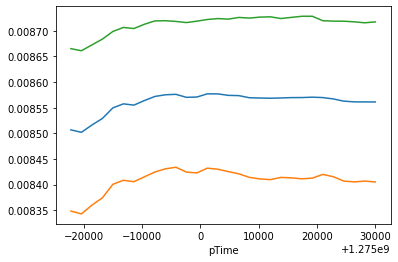

In [112]:
sns.lineplot(data=merged_ts)
sns.lineplot(data=pattern_1)
sns.lineplot(data=pattern_2)